# Sta Hw 05

### Question 1
What is the key factor that makes the difference between ideas that can, and cannot be examined and tested statistically?

One key factor is to make sure that the object we are examining is measured clearly and quantifiably and can be used within variables and statistical analysis.  

What would you describe is the key "criteria" defining what a good null hypothesis is? And what is the difference between a null hypothesis and an alternative hypothesis in the context of hypothesis testing? 

A good null hypothesis would have to be clear on the specific subject that we are testing, we can reject or fail to reject it with our received or estimated statistics. Comparing the null hypothesis and the alternative hypothesis, the null hypothesis normally assumes no effect or differences on the subject we are testing. The alternative hypothesis demonstrates a suggestion of having an effect on the subject. 

### Question 2 
How would you describe what the sentence above means? Explain this concisely in your own words for a "non-statsitical" audience, defining the technical statistical terminology you use in your answer. 

The sentence is basically saying that by using our sample information, we are able to do some calculations and get the estimation of our population parameter. In this case, population is everything or everyone we care about. And when we are making our final decision, we state our conclusion base on our point of view on the population level statitics. 

### Question 3
The second "Pre-lecture" video (above) explains that we "imagine a world where the null hypothesis is true" when calculating a p-value? Explain why this is in your own words in a way that makes the most sense to you.

By using the null hypothesis, we can assume a world that such subject being true. Which is assuming that nothing unusual will happen as our tests goes on. This helps use to see how our statistics presents a response to our hypothesis and decide we either reject it or failed to reject it. 

### Question 4
The second "Pre-lecture" video (above) suggests that a smaller p-value makes the null hypothesis look more ridiculous. Explain why this is in your own words in a way that makes the most sense to you, clarifying the meaning of any technical statistical terminology you use in your answer.

The p-value demonstrates how likely our assumtion will happen. Which is the probability of the chances that the null hypothesis will happen. When the p-value is a very small number, it suggest that the null hypothesis is unusual to happen, which gives us the reason to reject our null hypothesis. 

### Question 5
Under my amazing directing and teaching the chatbot helped us format the module to calculate the possibility of whether a human has tendencies to tilt their heads when they are kissing. Which is done by the amazing np.random.binomial() method to simulate this entire module. The p-value we receive is around 0.0008 which it demonstrates to strongly reject our null hypothesis since it falls under the criteria of "Very strong evidence against the null hypothesis". Meaning that the chances of people having tendencies to tilt their heads while kissing are very much unusual to happen based on the simulation we did. 


In [8]:
# Code for Question 5

import numpy as np

# Simulation parameters
num_simulations = 100_000  # Number of simulations
sample_size = 124          # Total number of couples
observed_tilt_right = 80   # Observed number of right-tilting couples

# Simulate the number of couples tilting right under the null hypothesis (50% chance)
simulated_tilts = np.random.binomial(n=sample_size, p=0.5, size=num_simulations)

# Calculate the proportion of simulations where the result is at least as extreme as the observed result
p_value = np.mean(simulated_tilts >= observed_tilt_right)

# Output the p-value
print(f"P-value: {p_value}")


P-value: 0.00078


### Question 6
Can a smaller p-value definitively prove that the null hypothesis is false? Is it possible to definitively prove that Fido (from the "second pre-lecture video") is innocent using a p-value? Is it possible to difinitively prove that Fido is guilty using a p-value? How low or high does a p-value have to be to definitely prove one or the other? Explain this concisely in your own words.

The answer to this question would be no. This is due to the fact that our p-value only represents an estimated chances of something happening, we can never be sure that it will guaranteed to happen in real life. In other words, it is a very educational guess thats based on our estimation. Meanwhile, due to how the population statistic presents, the p-value may present differently. 

### Question 7


In [10]:
#Question 7 coding
import numpy as np
import pandas as pd

# Create the patient data
patient_data = pd.DataFrame({
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})
patient_data['HealthScoreChange'] = patient_data['FinalHealthScore'] - patient_data['InitialHealthScore']

# Observed proportion of positive improvements
observed_statistic = (patient_data['HealthScoreChange'] > 0).mean()
print(f"Observed proportion of positive improvements: {observed_statistic}")

# Set up the simulation parameters
np.random.seed(1)  # For reproducibility
number_of_simulations = 10_000
n_size = len(patient_data)

# Generate random improvement simulations under H0 (no average improvement)
simulated_statistics = np.zeros(number_of_simulations)

for i in range(number_of_simulations):
    # Randomly assign positive or zero improvement under H0
    random_improvement = np.random.choice([0, 1], size=n_size, replace=True)
    simulated_statistics[i] = random_improvement.mean()

# One-sided p-value: Proportion of simulations with statistic >= observed
p_value = np.mean(simulated_statistics >= observed_statistic)
print(f"One-tailed p-value: {p_value}")


Observed proportion of positive improvements: 0.8
One-tailed p-value: 0.0565


### Question 8
Clarity of your documentation, code, and written report
Description of the population (and sample) and parameter of interest (and corresponding observed test statistic)
- The population is the people in the entire world. The sample is the random sample of 80 students from sta130. Each sstudent tastes one cup of tea and were asked on whether the milk was poured in first or the tea. 
Formal null hypotheses 
- The proportion of students who can correctly identfy the order of pouring is equal to 0.5. 
- We Assume that p = 0.5
Provide an informal interpretive statement explaining in more casual everyday common language
- It denmonstrate that when asking a group of students whether the milk or tea was poured first. 
Alternative hypothesis HA in terms of H0
- Assume that p > 0.5
- More than half of the students can correctly identifyu which liquid was poured in first. 
Quantitative analysis addressing the validity of 
Explanation of the method clearly articulating the purpose of the usage of statistic(s) to address the population parameter of interest
- The method that was done through this population parametre calculation was through .random() method with bootstrapping to lead us to the final estimation after 10000 simulations. Lastly, the coding work were mainly contributed by the Chatbot. 

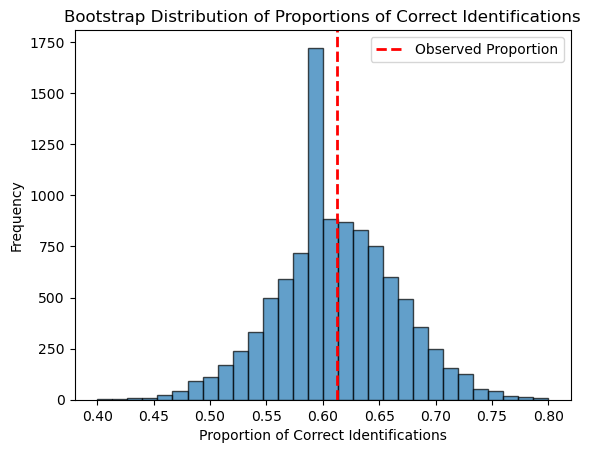

Observed Proportion: 0.6125
P-value: 0.5445


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
n_students = 80  # Total number of students
observed_correct = 49  # Correct identifications
p_null = 0.5  # Null hypothesis probability
n_bootstrap = 10000  # Number of bootstrap samples

# Function to generate bootstrap samples and calculate the proportion of correct identifications
def bootstrap_proportions(n_students, observed_correct, p_null, n_bootstrap):
    # Generate an array for the results
    bootstrap_results = []
    
    # Create an array representing correct (1) and incorrect (0) guesses
    actual_outcomes = [1] * observed_correct + [0] * (n_students - observed_correct)
    
    for _ in range(n_bootstrap):
        # Bootstrap sampling with replacement
        sample = np.random.choice(actual_outcomes, size=n_students, replace=True)
        # Calculate the proportion of correct guesses in the sample
        proportion_correct = np.mean(sample)
        bootstrap_results.append(proportion_correct)
    
    return bootstrap_results

# Generate bootstrap proportions
bootstrap_results = bootstrap_proportions(n_students, observed_correct, p_null, n_bootstrap)

# Calculate the observed proportion
observed_proportion = observed_correct / n_students

# Calculate the p-value
# Count how many bootstrap results are greater than or equal to the observed proportion
p_value = np.sum(np.array(bootstrap_results) >= observed_proportion) / n_bootstrap

# Plot the bootstrap distribution
plt.hist(bootstrap_results, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(observed_proportion, color='red', linestyle='dashed', linewidth=2, label='Observed Proportion')
plt.title('Bootstrap Distribution of Proportions of Correct Identifications')
plt.xlabel('Proportion of Correct Identifications')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print the results
print(f"Observed Proportion: {observed_proportion:.4f}")
print(f"P-value: {p_value:.4f}")


### Chatbot summary:
Certainly! Here’s a comprehensive summary of everything we covered in this section related to Fisher's Tea Experiment and the associated statistical analysis:

---

## Summary of the Fisher's Tea Experiment and Statistical Analysis

### Overview of the Experiment
- **Background**: The Fisher's Tea Experiment originates from a discussion between the statistician Ronald Fisher and Dr. Muriel Bristol, who claimed she could distinguish between tea poured with milk added first and vice versa.
- **Objective**: The goal was to determine if Bristol's ability to identify the pouring order was due to chance or if she had a genuine sensory distinction.

### Experimental Design
- **Sample**: A random sample of 80 STA130 students participated in the experiment. Each student was given one cup of tea and asked to determine the order of pouring (milk or tea).
- **Results**: Out of the 80 students, 49 were able to correctly identify the pouring order.

### Statistical Hypotheses
1. **Null Hypothesis (\(H_0\))**: 
   - \(H_0: p = 0.5\)
   - This hypothesis posits that the proportion of students correctly identifying the pouring order is equal to 0.5, implying random guessing.

2. **Alternative Hypothesis (\(H_A\))**:
   - \(H_A: p > 0.5\)
   - This hypothesis suggests that more than 50% of the students can accurately identify the order, indicating a sensory ability beyond random guessing.

### Interpretive Statements
- **Formal Interpretation**: The null hypothesis states that the students’ correct identifications are no better than random chance.
- **Informal Interpretation**: In simpler terms, if we assume the null hypothesis is true, students' guesses would be equivalent to flipping a coin.

### Statistical Analysis
1. **Binomial Test**:
   - We discussed using the binomial test to calculate the p-value associated with the observed statistic of 49 correct identifications. This method assesses the likelihood of observing at least 49 correct guesses under the null hypothesis.

2. **Bootstrapping Approach**:
   - An alternative analysis was conducted using bootstrapping, which involves generating random samples with replacement from the observed data to create a distribution of possible outcomes.
   - The proportion of correct identifications was calculated for each bootstrap sample, and a p-value was derived by comparing the observed proportion to this bootstrap distribution.

### Results
- Both methods aimed to evaluate the evidence against the null hypothesis:
  - **Binomial Test**: Calculated p-value to assess the significance of the results.
  - **Bootstrapping**: Visualized the bootstrap distribution and provided an empirical p-value based on random sampling.

### Visualization
- A histogram was generated to visualize the distribution of bootstrap proportions, with the observed proportion highlighted, aiding in the interpretation of results.

### Conclusion
- The statistical analyses conducted provided a framework to evaluate the claim made by Dr. Bristol regarding her ability to distinguish the pouring order of tea and milk.
- The outcome of the p-values from both the binomial test and bootstrapping would indicate whether there is statistically significant evidence to reject the null hypothesis in favor of the alternative hypothesis.

---

This summary encapsulates the objectives, methodologies, analyses, and interpretations associated with the Fisher's Tea Experiment and the statistical processes we explored in this section. Let me know if you need any additional details or clarification on any points
https://chatgpt.com/share/670e0f4b-6690-8006-a73b-72bc80396219